# Step 1: Setting Up the Initial Dataset
Create a synthetic dataset to demonstrate evaluation techniques.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=5,
    random_state=42
)

# Initial train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Dataset Information:")
print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Dataset Information:
Total samples: 1000
Training samples: 700
Testing samples: 300


# Step 2: Training a Model on the Initial Split
Train and evaluate a model using a single split.

In [ ]:
# Initialize and train random forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Initial evaluation
y_pred = clf.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"\nInitial Model Accuracy: {initial_accuracy:.3f}")



Initial Model Accuracy: 0.913


# Step 3: Highlighting the Risks of Single Splits
Demonstrate how different splits affect model performance.

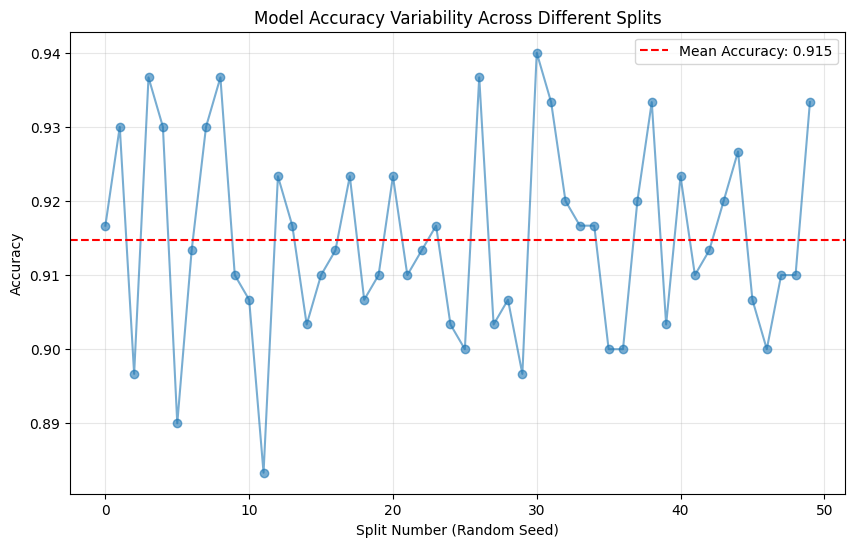

In [ ]:
# Multiple train-test splits
n_splits = 50
accuracies = []
split_seeds = range(n_splits)

for seed in split_seeds:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )
    clf.fit(X_train_split, y_train_split)
    y_pred_split = clf.predict(X_test_split)
    accuracies.append(accuracy_score(y_test_split, y_pred_split))

# Plot accuracy variability
plt.figure(figsize=(10, 6))
plt.plot(split_seeds, accuracies, marker='o', alpha=0.6)
plt.axhline(y=np.mean(accuracies), color='r', linestyle='--',
            label=f'Mean Accuracy: {np.mean(accuracies):.3f}')
plt.title('Model Accuracy Variability Across Different Splits')
plt.xlabel('Split Number (Random Seed)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Step 4: Introducing Robust Evaluation Techniques
Implement cross-validation for more reliable evaluation.


Cross-Validation Results:
Mean Accuracy: 0.914
Standard Deviation: 0.012


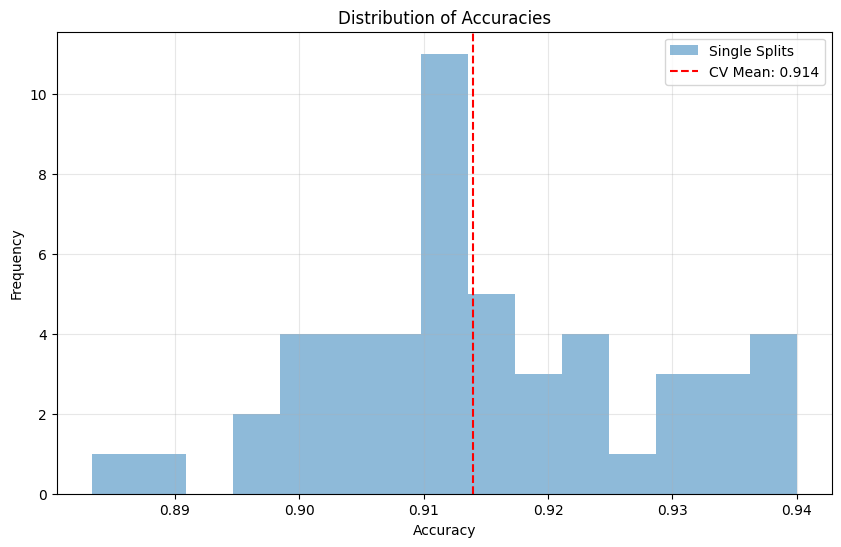

<ipython-input-4-92fc1913e7b2>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores for scores in cv_results.values()], labels=cv_results.keys())


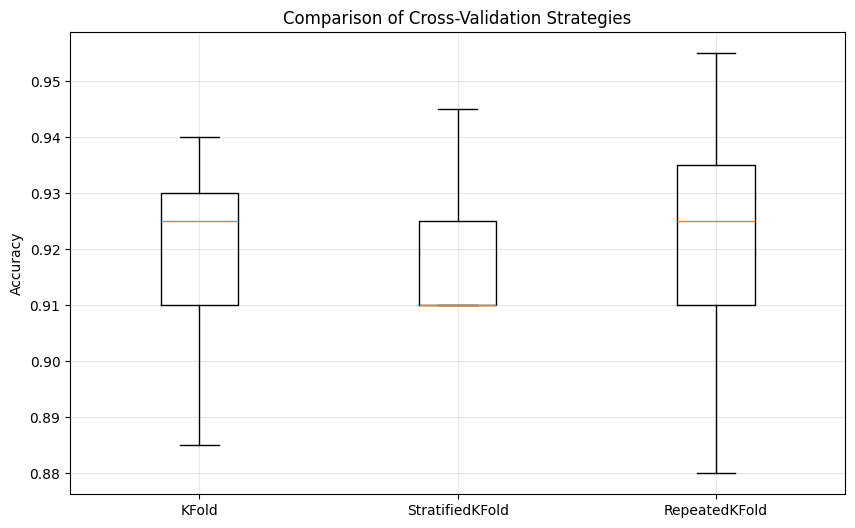

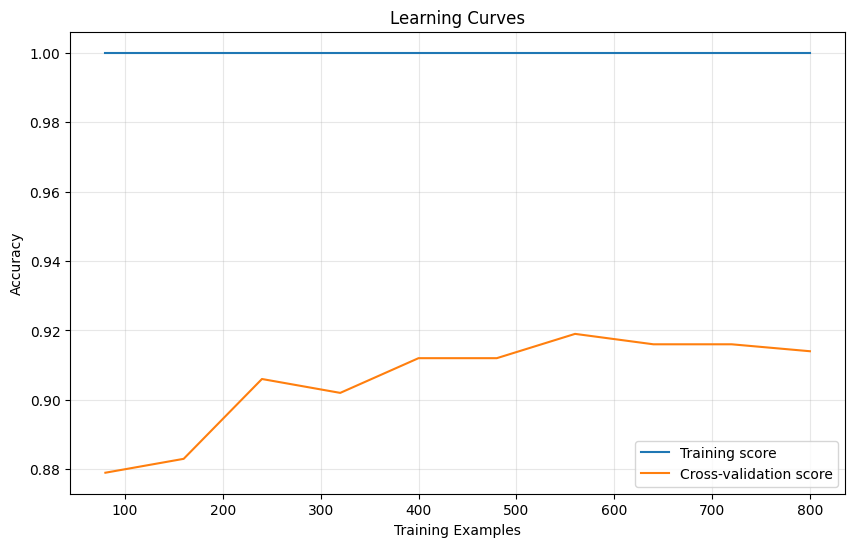

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores):.3f}")
print(f"Standard Deviation: {np.std(cv_scores):.3f}")

# Visualize cross-validation distribution
# =====================================

plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=15, alpha=0.5, label='Single Splits')
plt.axvline(np.mean(cv_scores), color='r', linestyle='--',
            label=f'CV Mean: {np.mean(cv_scores):.3f}')
plt.title('Distribution of Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare different CV strategies
# =====================================

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold

cv_strategies = {
    'KFold': KFold(n_splits=5, shuffle=True, random_state=42),
    'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'RepeatedKFold': RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
}

cv_results = {}
for name, cv in cv_strategies.items():
    scores = cross_val_score(clf, X, y, cv=cv)
    cv_results[name] = scores

# Plot CV comparison
plt.figure(figsize=(10, 6))
plt.boxplot([scores for scores in cv_results.values()], labels=cv_results.keys())
plt.title('Comparison of Cross-Validation Strategies')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

# Learning curve analysis
# =====================================

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()